In [168]:
import os
import sys
import tensorflow as tf

directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from NsgaII import Nsga_II
from utils.load_data import load_mnist
from CapsNet import CapsNet

(X_train, y_train), (X_test , y_test) = load_mnist(size=(5000, 3000))

In [169]:
params = {'epochs': 5, 'r': 2, 'no_of_conv_kernels': 64, 'secondary_capsule_vector': 6, 'dense_1': 256, 'dense_2': 512, 'epsilon': 0.08411185848750914, 'm_plus': 0.9504174153527706, 'm_minus': 0.1648052052496743, 'lambda_': 0.6831030565866469, 'alpha': 0.006858184909559632, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}

print(params)
NasCapsNet = CapsNet(**params)
NasCapsNet._name = 'NasCapsNet'
NasCapsNet.compile()
NasCapsNet.summary()

{'epochs': 5, 'r': 2, 'no_of_conv_kernels': 64, 'secondary_capsule_vector': 6, 'dense_1': 256, 'dense_2': 512, 'epsilon': 0.08411185848750914, 'm_plus': 0.9504174153527706, 'm_minus': 0.1648052052496743, 'lambda_': 0.6831030565866469, 'alpha': 0.006858184909559632, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}
Model: "NasCapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_66 (Dense)            multiple                  0 (unused)
                                                                 
 dense_67 (Dense)            multiple                  0 (unused)
                             

In [170]:
NasCapsNet.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 5/5: 100%|██████████| 79/79 [00:13<00:00,  6.01it/s]

Validation loss is not decreasing anymore, risk of overfitting the model after 5 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.9578, 0.9758, 0.9862, 0.9902]),
 'loss': ListWrapper([0.4603039938956499, 0.2438753843307495, 0.21977468859404325, 0.2091642701998353]),
 'val_accuracy': ListWrapper([0.9343333333333333, 0.952, 0.9586666666666667, 0.963]),
 'val_loss': ListWrapper([0.29393548611551523, 0.2604683628305793, 0.2582251327112317, 0.2344982698559761])}

In [171]:
n_rounds = 100

import time

caps_nas_inv_time = []
for i in range(n_rounds):
    start = time.time()
    NasCapsNet.predict(X_test)
    end = time.time()
    caps_nas_inv_time.append((end - start) / len(X_test) * 1000)
caps_nas_inv_time

[0.5456270376841228,
 0.541628360748291,
 0.5257422924041748,
 0.5309889316558838,
 0.5353047053019206,
 0.5288573106129965,
 0.5544916788736979,
 0.5408573150634766,
 0.559886614481608,
 0.579330285390218,
 0.5147770245869955,
 0.5372196833292643,
 0.554570992787679,
 0.5288419723510742,
 0.5393837292989095,
 0.5513753096262614,
 0.5284783045450847,
 0.57115904490153,
 0.5392993291219076,
 0.5749640464782715,
 0.5491913159688314,
 0.5334579944610596,
 0.5245856444040934,
 0.530821959177653,
 0.548986037572225,
 0.5388176441192627,
 0.5458673636118571,
 0.5175636609395345,
 0.5171703497568766,
 0.5620182355244955,
 0.5135625998179117,
 0.5231983661651611,
 0.535497268040975,
 0.5514009793599447,
 0.5297959645589193,
 0.542270024617513,
 0.4970160325368245,
 0.5423913796742756,
 0.5147303740183513,
 0.5735843976338704,
 0.5166159470876058,
 0.5353612899780273,
 0.528112014134725,
 0.5295153458913168,
 0.5159632364908854,
 0.5256977081298828,
 0.5519313017527262,
 0.517997662226359,
 0.4

In [172]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "dense_1": 512,
    "dense_2": 1024
}

BaselineCapsNetModel = CapsNet(**params)
BaselineCapsNetModel._name = 'BaselineCapsNetModel'
BaselineCapsNetModel.compile()
BaselineCapsNetModel.summary()

Model: "BaselineCapsNetModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_68 (Dense)            multiple                  0 (unused)
                                                                 
 dense_69 (Dense)            multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [173]:
BaselineCapsNetModel.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 8/10: 100%|██████████| 79/79 [00:27<00:00,  2.89it/s]

Validation loss is not decreasing anymore, risk of overfitting the model after 8 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.9586, 0.9806, 0.9894, 0.992, 0.9958, 0.9964, 0.9982]),
 'loss': ListWrapper([0.30356450006365776, 0.07991684251464903, 0.05447108414955437, 0.04318792780395597, 0.03082038019783795, 0.02384691033512354, 0.01624761935090646]),
 'val_accuracy': ListWrapper([0.932, 0.9546666666666667, 0.961, 0.9656666666666667, 0.965, 0.9643333333333334, 0.969]),
 'val_loss': ListWrapper([0.1364526920951903, 0.09136365260928869, 0.0793572689872235, 0.07154160994105041, 0.06445719627663493, 0.05981018766760826, 0.05245499196462333])}

In [174]:
n_rounds = 100

import time

caps_inv_time = []
for i in range(n_rounds):
    start = time.time()
    BaselineCapsNetModel.predict(X_test)
    end = time.time()
    caps_inv_time.append((end - start) / len(X_test) * 1000)

In [175]:
caps_inv_time

[1.0700980027516682,
 1.0453852812449136,
 1.0649840037027996,
 1.067090670267741,
 1.0789249738057454,
 1.2116187413533528,
 1.1304822762807212,
 1.0375394026438396,
 1.0823500156402588,
 1.0768147309621177,
 1.130808671315511,
 1.0508679548899331,
 1.0663082599639893,
 1.1401739915211995,
 1.0435505708058674,
 1.1064426898956299,
 1.1184316476186118,
 1.0846999486287434,
 1.1014269987742107,
 1.065580685933431,
 1.057714621225993,
 1.1204817295074463,
 1.131808360417684,
 1.062264362970988,
 0.975140651067098,
 1.022499958674113,
 1.05730930964152,
 1.036854346593221,
 1.0844016075134277,
 1.106386661529541,
 1.1210089524586995,
 1.0097912947336833,
 1.2030502955118814,
 1.167991002400716,
 1.0855849583943686,
 1.068415641784668,
 1.0515006383260093,
 1.099898338317871,
 1.061762015024821,
 1.074704647064209,
 1.1590163707733154,
 1.0317010084788005,
 1.0117976665496826,
 1.0359686215718589,
 1.0558313528696697,
 1.072995662689209,
 1.036955992380778,
 1.1089297135670981,
 1.14551266

In [176]:
import numpy as np

np.mean(caps_inv_time)

1.0655910420417785

In [177]:
ConvNetModel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
ConvNetModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_70 (Dense)            (None, 100)               540900    
                                                                 
 dense_71 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [178]:
ConvNetModel.compile(tf.optimizers.legacy.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
tf_y_train = tf.keras.utils.to_categorical(y_train)
tf_y_test = tf.keras.utils.to_categorical(y_test)

In [179]:
history = ConvNetModel.fit(X_train, tf_y_train, epochs=10, batch_size=32, validation_data=(X_test, tf_y_test))

Epoch 1/10
157/157 [==============================] - 1s 6ms/step - loss: 0.5595 - accuracy: 0.8360 - val_loss: 0.4034 - val_accuracy: 0.8733
Epoch 2/10
157/157 [==============================] - 1s 5ms/step - loss: 0.2189 - accuracy: 0.9366 - val_loss: 0.2763 - val_accuracy: 0.9150
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 0.1384 - accuracy: 0.9602 - val_loss: 0.2049 - val_accuracy: 0.9370
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0840 - accuracy: 0.9762 - val_loss: 0.2001 - val_accuracy: 0.9357
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0585 - accuracy: 0.9854 - val_loss: 0.1778 - val_accuracy: 0.9430
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0413 - accuracy: 0.9904 - val_loss: 0.1643 - val_accuracy: 0.9453
Epoch 7/10
157/157 [==============================] - 1s 7ms/step - loss: 0.0254 - accuracy: 0.9944 - val_loss: 0.1595 - val_accuracy: 0.9510
Epoch 

In [180]:
n_rounds = 100

import time

cnn_inv_time = []
for i in range(n_rounds):
    start = time.time()
    ConvNetModel.predict(X_test)
    end = time.time()
    cnn_inv_time.append((end - start) / len(X_test) * 1000)

94/94 [==============================] - 0s 1ms/step


In [181]:
cnn_inv_time

[0.06638900438944499,
 0.059379021326700844,
 0.058427651723225914,
 0.04843966166178386,
 0.04971798261006673,
 0.0484920342763265,
 0.05398996671040853,
 0.05405569076538086,
 0.05215771993001302,
 0.05303764343261719,
 0.04997571309407552,
 0.0535283088684082,
 0.05414970715840657,
 0.0549320379892985,
 0.05012901624043783,
 0.06527845064798991,
 0.05648930867513021,
 0.048722028732299805,
 0.04774594306945801,
 0.0474709669748942,
 0.04990069071451823,
 0.05394665400187174,
 0.07042256991068523,
 0.06081589063008626,
 0.05092390378316243,
 0.06296141942342123,
 0.05429999033610026,
 0.05873497327168782,
 0.05257105827331543,
 0.05789868036905924,
 0.04997730255126953,
 0.05115803082784017,
 0.04863333702087402,
 0.049094994862874344,
 0.04869667689005534,
 0.047983010609944664,
 0.05003635088602702,
 0.05020697911580404,
 0.0579683780670166,
 0.04992135365804037,
 0.05121000607808431,
 0.054079929987589516,
 0.052909294764200844,
 0.05314826965332031,
 0.04911661148071289,
 0.05092

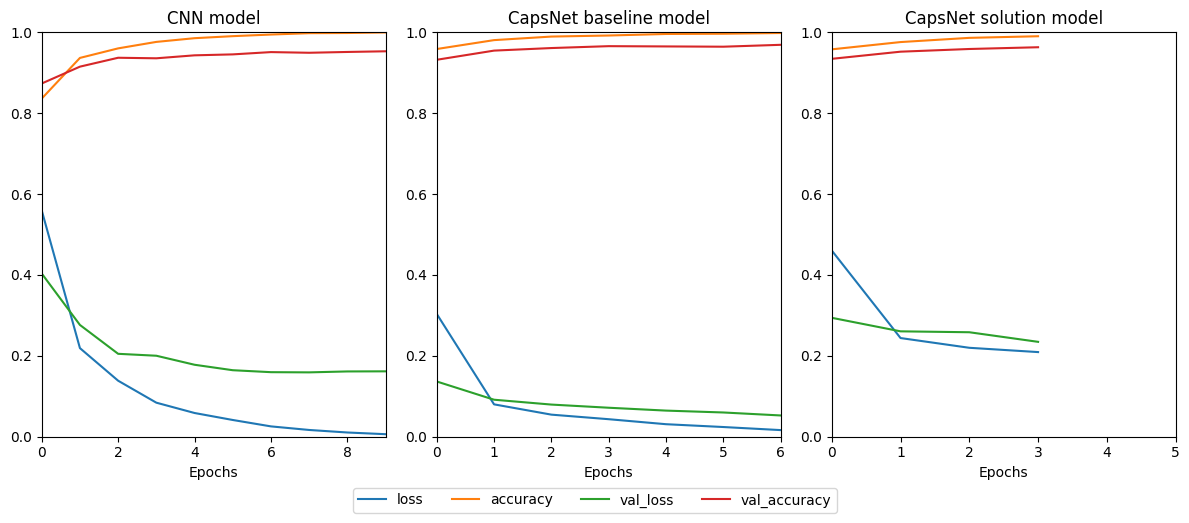

In [182]:
import matplotlib.pyplot as plt
import time
import pandas as pd

NasCapsNet.training_metrics = {
    'loss': NasCapsNet.training_metrics['loss'],
    'accuracy': NasCapsNet.training_metrics['accuracy'],
    'val_loss': NasCapsNet.training_metrics['val_loss'],
    'val_accuracy': NasCapsNet.training_metrics['val_accuracy'],
}

BaselineCapsNetModel.training_metrics = {
    'loss': BaselineCapsNetModel.training_metrics['loss'],
    'accuracy': BaselineCapsNetModel.training_metrics['accuracy'],
    'val_loss': BaselineCapsNetModel.training_metrics['val_loss'],
    'val_accuracy': BaselineCapsNetModel.training_metrics['val_accuracy'],
}

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

df_baseline = pd.DataFrame(history.history)
plot_baseline = df_baseline.plot(ax=axes[0], title="CNN model", legend=False)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, 9)

df_capsnet = pd.DataFrame(BaselineCapsNetModel.training_metrics)
plot_capsnet = df_capsnet.plot(ax=axes[1], title="CapsNet baseline model", legend=False)  # Set legend=False here
axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, 6)

df_capsnet_nas = pd.DataFrame(NasCapsNet.training_metrics)
plot_capsnet_nas = df_capsnet_nas.plot(ax=axes[2], title="CapsNet solution model", legend=False)  # Set legend=False here
axes[2].set_ylim(0, 1)
axes[2].set_xlim(0, 5)

axes[0].set_xlabel("Epochs")
axes[1].set_xlabel("Epochs")
axes[2].set_xlabel("Epochs")

# Show only one legend for all three plots
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=4)

plt.tight_layout()
plt.show()


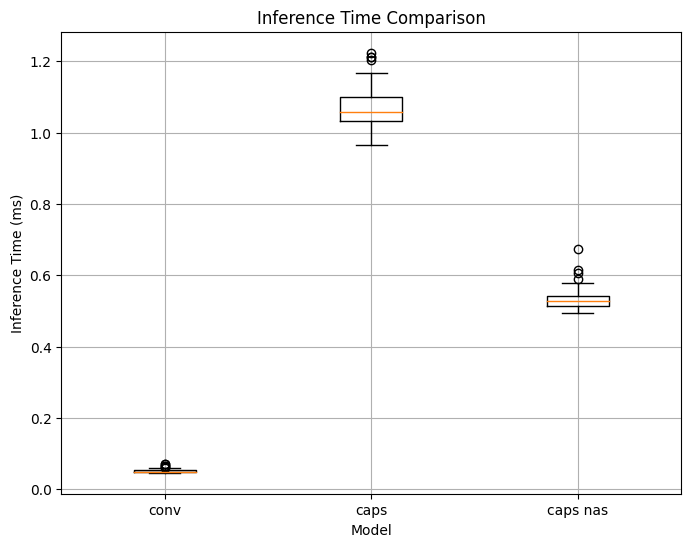

In [183]:
df = pd.DataFrame({
    "conv": cnn_inv_time,
    "caps": caps_inv_time,
    "caps nas": caps_nas_inv_time
})
plt.figure(figsize=(8, 6))
plt.boxplot(df.values, labels=df.columns)
plt.title('Inference Time Comparison')
plt.xlabel('Model')
plt.ylabel('Inference Time (ms)')
plt.grid(True)
plt.show()

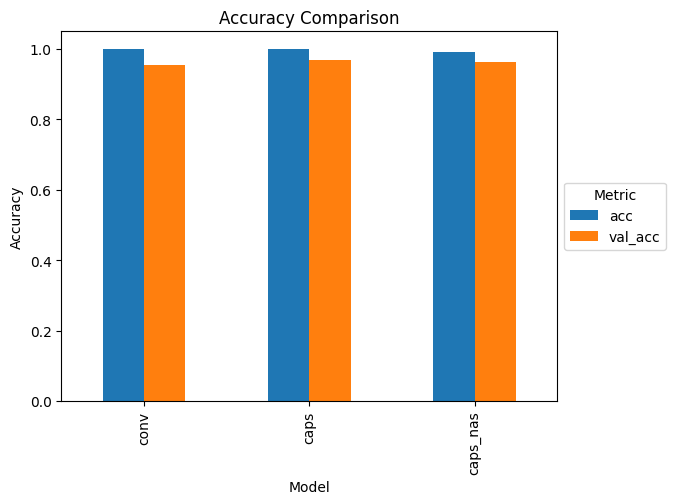

In [184]:
df = pd.DataFrame({
    'conv': {'acc': history.history['accuracy'][-1], 'val_acc': history.history['val_accuracy'][-1]},
    'caps': {'acc': BaselineCapsNetModel.training_metrics['accuracy'][-1], 'val_acc': BaselineCapsNetModel.training_metrics['val_accuracy'][-1]},
    'caps_nas': {'acc': NasCapsNet.training_metrics['accuracy'][-1], 'val_acc': NasCapsNet.training_metrics['val_accuracy'][-1]},
})

df = df.T
df.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()